testing out in-progress branch https://github.com/chrishavlin/yt/tree/cutting_spheres (and cuting_spheres_pixelizer_temp)

In [1]:
import numpy as np

import yt
from yt.testing import fake_amr_ds
import matplotlib.pyplot as plt 

ds = fake_amr_ds(geometry="spherical")
normal = np.array([0.0, 0.0, 1.0])
plane_center = np.array([0.0, 0.0, 0.5])
slc = ds.cutting_mixed(normal, plane_center)

yt : [INFO     ] 2024-02-16 14:43:25,037 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-02-16 14:43:25,037 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-02-16 14:43:25,038 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-16 14:43:25,038 Parameters: domain_right_edge         = [1.         3.14159265 6.28318531]
yt : [INFO     ] 2024-02-16 14:43:25,038 Parameters: cosmological_simulation   = 0


In [2]:
%%time
frb = slc.to_frb(2.0, (100,200))
bvals = frb[("index", "r")]

yt : [INFO     ] 2024-02-16 14:43:25,965 Making a fixed resolution buffer of (('index', 'r')) 100 by 200


CPU times: user 85.4 ms, sys: 10.5 ms, total: 96 ms
Wall time: 92.4 ms


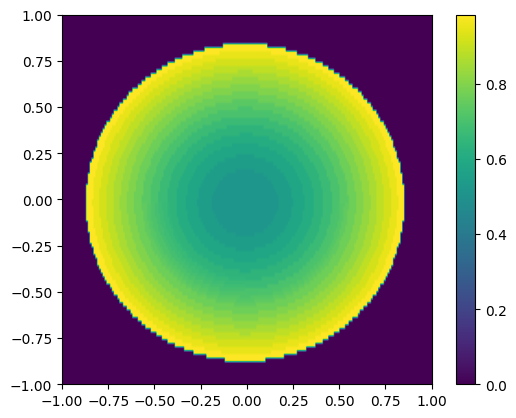

In [3]:
plt.imshow(bvals, extent=frb.bounds, origin='lower')
plt.colorbar()

The above slice is parallel to xy and passes through z=0.5, so values go from 0.5 to 1!

In [4]:
ds = yt.load_sample("KeplerianDisk")
normal = np.array([0.0, 1.0, 0.0])
plane_center = np.array([0.0, 0.0, 0.0])
slc = ds.cutting_mixed(normal, plane_center)

yt : [INFO     ] 2024-02-16 14:44:21,926 Sample dataset found in '/Users/chavlin/data/yt_data/KeplerianDisk/disk.out1.00000.athdf'
yt : [WARNING  ] 2024-02-16 14:44:22,028 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2024-02-16 14:44:22,029 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2024-02-16 14:44:22,029 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2024-02-16 14:44:22,030 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-02-16 14:44:22,059 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-02-16 14:44:22,059 Parameters: domain_dimensions         = [256  64   4]
yt : [INFO     ] 2024-02-16 14:44:22,060 Parameters: domain_left_edge          = [0.3        1.17809725 0.        ]
yt : [INFO     ] 2024-02-16 14:44:22,060 Parameters: domain_right_edge         = [3.         1.96349541 6.28318531]
yt : [INFO     ] 2024-02-16 14:44:22,060 Parameters: cosmological_simulation   = 0


In [5]:
%%time
frb = slc.to_frb(8.0, 800)
bvals = frb[("athena_pp", "dens")]

yt : [INFO     ] 2024-02-16 14:44:28,337 Making a fixed resolution buffer of (('athena_pp', 'dens')) 800 by 800


CPU times: user 4.54 s, sys: 74.7 ms, total: 4.62 s
Wall time: 4.61 s


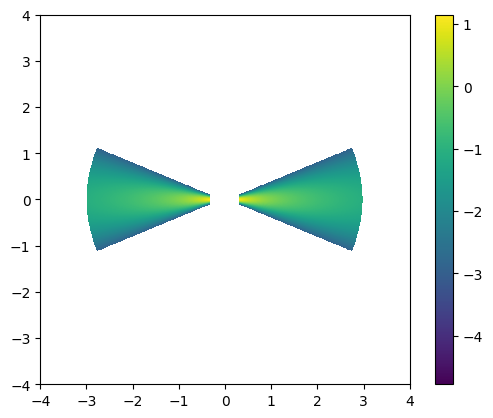

In [6]:
mask = frb.get_mask(("athena_pp", "dens"))
bvals[~mask] = np.nan
plt.imshow(np.log10(bvals), extent=frb.bounds, origin='lower')
plt.colorbar()

not positive that's what this should look like, but it matches a yt slice

yt : [INFO     ] 2024-02-16 14:45:05,011 xlim = 0.277164 3.000000
yt : [INFO     ] 2024-02-16 14:45:05,011 ylim = -1.148050 1.148050
yt : [INFO     ] 2024-02-16 14:45:05,012 Setting origin='native' for spherical geometry.
yt : [INFO     ] 2024-02-16 14:45:05,014 xlim = 0.277164 3.000000
yt : [INFO     ] 2024-02-16 14:45:05,014 ylim = -1.148050 1.148050
yt : [INFO     ] 2024-02-16 14:45:05,015 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



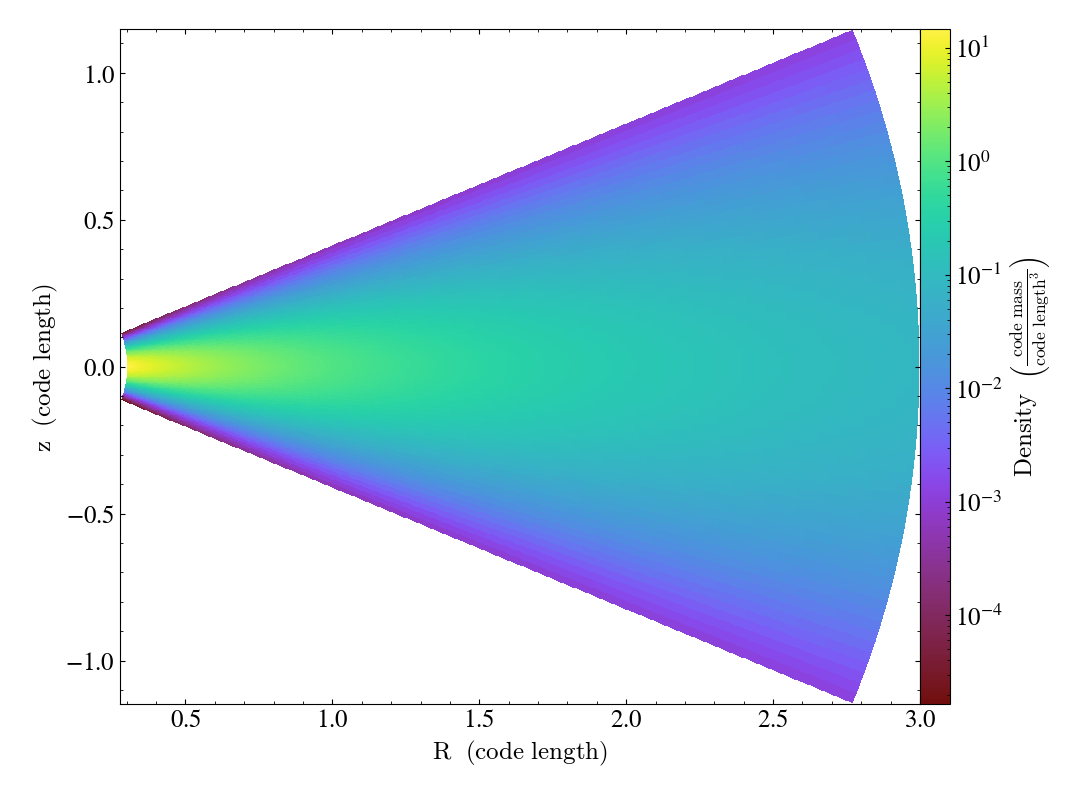

In [7]:
yt.SlicePlot(ds, 'phi', 'density')